# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [3]:
picture_size = 48
folder_path = "images/images/"

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 32520 images belonging to 7 classes.
Found 8281 images belonging to 7 classes.


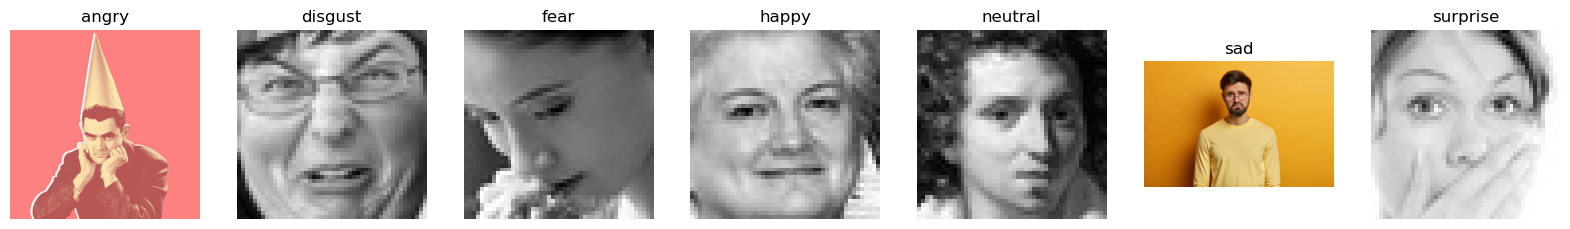

In [5]:
fig, axes = plt.subplots(1, 7, figsize=(20, 8))

# Assure-toi d'avoir ajusté le chemin du répertoire d'entraînement
train_dir = folder_path + "train"

# Liste des classes (nom des répertoires dans le répertoire d'entraînement)
classes = os.listdir(train_dir)
for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    img_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    axes[i].imshow(plt.imread(img_path), cmap='gray')  # Utilise 'gray' pour les images en niveaux de gris
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Masque les axes

plt.show()

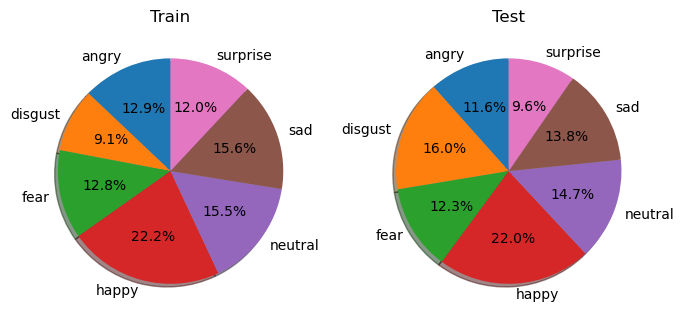

Emotion : angry
	Training : 4208
	Testing : 960
Emotion : disgust
	Training : 2954
	Testing : 1326
Emotion : fear
	Training : 4153
	Testing : 1018
Emotion : happy
	Training : 7214
	Testing : 1825
Emotion : neutral
	Training : 5033
	Testing : 1216
Emotion : sad
	Training : 5067
	Testing : 1139
Emotion : surprise
	Training : 3893
	Testing : 797


In [6]:
#  le chemin des répertoires d'entraînement et de test
train_dir = folder_path + "train"
test_dir = folder_path + "validation"

x_train = np.array([len(os.listdir(os.path.join(train_dir, i))) for i in classes])
x_test = np.array([len(os.listdir(os.path.join(test_dir, i))) for i in classes])
label = classes

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in classes:
    print('Emotion : ' + i)
    print('\tTraining : ' + str(len(os.listdir(os.path.join(train_dir, i)))))
    print('\tTesting : ' + str(len(os.listdir(os.path.join(test_dir, i)))))


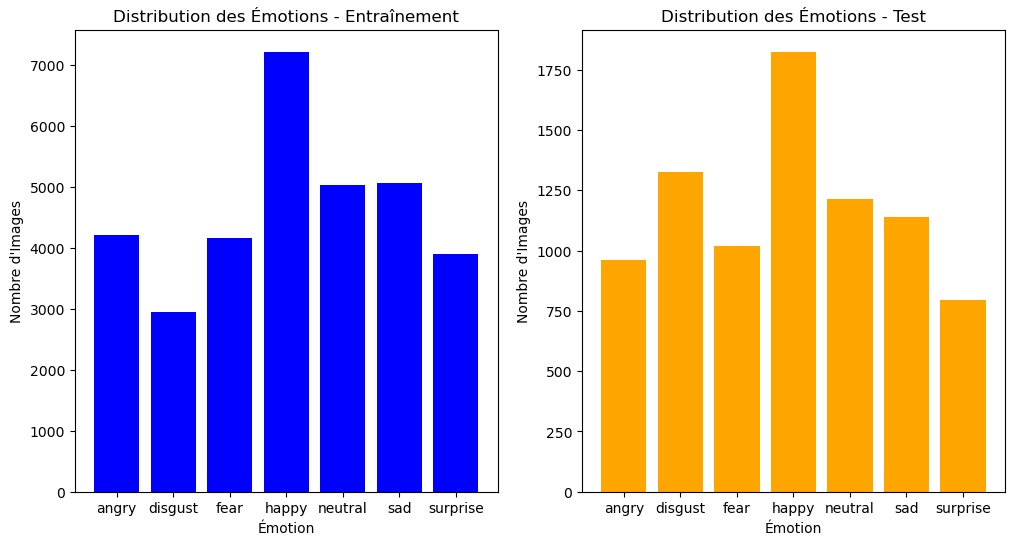

In [7]:
# Obtention du nombre d'images par émotion dans l'ensemble d'entraînement
train_emotion_counts = [len(os.listdir(os.path.join(train_set.directory, emotion))) for emotion in train_set.class_indices.keys()]

# Obtention du nombre d'images par émotion dans l'ensemble de test
test_emotion_counts = [len(os.listdir(os.path.join(test_set.directory, emotion))) for emotion in test_set.class_indices.keys()]

# Liste des émotions
emotions = list(train_set.class_indices.keys())

# Création de l'histogramme
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme pour l'ensemble d'entraînement
axes[0].bar(emotions, train_emotion_counts, color='blue')
axes[0].set_title('Distribution des Émotions - Entraînement')
axes[0].set_xlabel('Émotion')
axes[0].set_ylabel('Nombre d\'Images')

# Histogramme pour l'ensemble de test
axes[1].bar(emotions, test_emotion_counts, color='orange')
axes[1].set_title('Distribution des Émotions - Test')
axes[1].set_xlabel('Émotion')
axes[1].set_ylabel('Nombre d\'Images')

plt.show()


# Making Training and Validation Data

# Model Building

In [8]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data 

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\pc\AppData\Local\Temp\ipykernel_7500\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/100



254/254 [==============================] - ETA: 0s - loss: 1.8246 - accuracy: 0.3136WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 2337s 9s/step - loss: 1.8246 - accuracy: 0.3136 - val_loss: 1.5961 - val_accuracy: 0.4148 - lr: 0.0010
Epoch 2/100
254/254 [==============================] - ETA: 0s - loss: 1.4617 - accuracy: 0.4507WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 1064s 4s/step - loss: 1.4617 - accuracy: 0.4507 - val_loss: 1.3789 - val_accuracy: 0.4841 - lr: 0.0010
Epoch 3/100
254/254 [==============================] - ETA: 0s - loss: 1.2925 - accuracy: 0.5144WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 1029s 4s/step - loss: 1.2925 - accuracy: 0.5144 - val_loss: 1.3003 - val_accuracy: 0.5151 - lr: 0.0010
Epoch 4/100
254/254 [==============================] - ETA: 0s - loss: 1.1751 - accuracy: 0.5570WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 1000s 4s/step - loss: 1.1751 - accuracy: 0.5570 - val_loss: 1.4112 - val_accuracy: 0.4961 - lr: 0.0010
Epoch 5/100
254/254 [==============================] - ETA: 0s - loss: 1.1003 - accuracy: 0.5842WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 1002s 4s/step - loss: 1.1003 - accuracy: 0.5842 - val_loss: 1.3768 - val_accuracy: 0.4941 - lr: 0.0010
Epoch 6/100
254/254 [==============================] - ETA: 0s - loss: 1.0391 - accuracy: 0.6108WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 885s 3s/step - loss: 1.0391 - accuracy: 0.6108 - val_loss: 1.1029 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 7/100
254/254 [==============================] - ETA: 0s - loss: 0.9828 - accuracy: 0.6320WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 526s 2s/step - loss: 0.9828 - accuracy: 0.6320 - val_loss: 1.1958 - val_accuracy: 0.5486 - lr: 0.0010
Epoch 8/100
254/254 [==============================] - ETA: 0s - loss: 0.9317 - accuracy: 0.6528WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 528s 2s/step - loss: 0.9317 - accuracy: 0.6528 - val_loss: 1.0764 - val_accuracy: 0.6019 - lr: 0.0010
Epoch 9/100
254/254 [==============================] - ETA: 0s - loss: 0.8896 - accuracy: 0.6672WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 536s 2s/step - loss: 0.8896 - accuracy: 0.6672 - val_loss: 0.9218 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 10/100
254/254 [==============================] - ETA: 0s - loss: 0.8506 - accuracy: 0.6811WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 531s 2s/step - loss: 0.8506 - accuracy: 0.6811 - val_loss: 1.0195 - val_accuracy: 0.6185 - lr: 0.0010
Epoch 11/100
254/254 [==============================] - ETA: 0s - loss: 0.8165 - accuracy: 0.6946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 530s 2s/step - loss: 0.8165 - accuracy: 0.6946 - val_loss: 0.8755 - val_accuracy: 0.6810 - lr: 0.0010
Epoch 12/100
254/254 [==============================] - ETA: 0s - loss: 0.7734 - accuracy: 0.7094WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 535s 2s/step - loss: 0.7734 - accuracy: 0.7094 - val_loss: 1.0144 - val_accuracy: 0.6270 - lr: 0.0010
Epoch 13/100
254/254 [==============================] - ETA: 0s - loss: 0.7300 - accuracy: 0.7271WARNING:tensorflow:Can save best model only with val_acc available, skipping.


254/254 [==============================] - 708s 3s/step - loss: 0.7300 - accuracy: 0.7271 - val_loss: 0.9868 - val_accuracy: 0.6351 - lr: 0.0010
Epoch 14/100
254/254 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.7409Restoring model weights from the end of the best epoch: 11.



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
254/254 [==============================] - 672s 3s/step - loss: 0.6929 - accuracy: 0.7409 - val_loss: 0.9314 - val_accuracy: 0.6716 - lr: 0.0010
Epoch 14: early stopping


# Plotting Accuracy & Loss

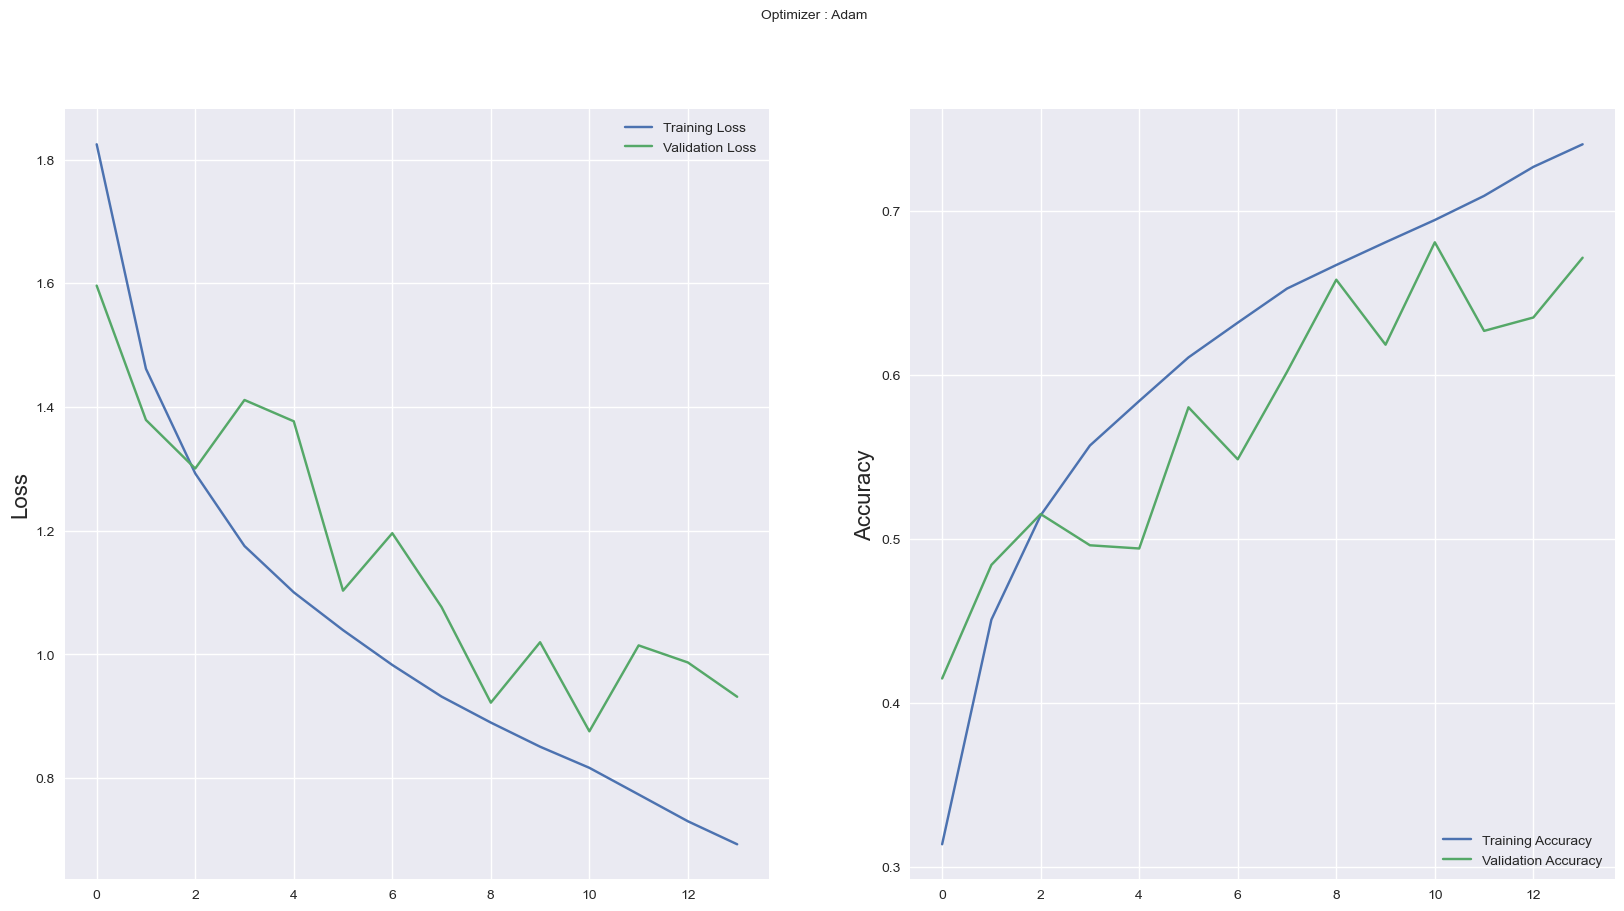

In [34]:

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()